##Thêm thư viện


In [1]:
import numpy as np ## Đại số tuyến tính
import pandas as pd ## Xử lý dữ liệu
import matplotlib ## Thư viện sử dụng để vẽ các đồ thị trong Python
import seaborn as sns# Trực quan hóa dữ liệu thống kê
import matplotlib.pyplot as plt ## Vẽ đồ thị trực quan hóa dữ liệu
from sklearn.model_selection import train_test_split## Thư viện dùng để phân chia vùng dữ liệu
from scipy import stats##Các hàm và phân phối thống kê
from sklearn.linear_model import LogisticRegression ## hàm LogisticRegression
from collections import Counter##Hàm đếm
from sklearn.metrics import confusion_matrix##ma trận vuông mô hình hóa
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier ## thư viện hàm xgboost
from sklearn.naive_bayes import BernoulliNB ##Thư viện chứa hàm naive_bayes Bernoulli
from sklearn.naive_bayes import GaussianNB##Thư viện chứa hàm naive_bayes Gaussian
from sklearn.ensemble import RandomForestRegressor ##Thư viện chứa hàm RandomForest
from sklearn.svm import SVC
from sklearn import preprocessing 
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

##Nhập dữ liệu

In [2]:
data=pd.read_csv('weatherAUS.csv') # Loading the Data

In [3]:
data##In ra dữ liệu

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161149,6/21/2018,Woomera,7.0,33.0,140.0,41.0,10.0,SE,66.0,4,E,104.0,7.0,3.0,96.0,998.0,1030.0,9.0,3.0,25.0,24.0,No,No
161150,6/22/2018,Woomera,-1.0,-3.0,220.0,32.0,8.0,SE,97.0,49,E,34.0,37.0,97.0,48.0,1022.0,1006.0,3.0,8.0,27.0,21.0,No,No
161151,6/23/2018,Woomera,4.0,18.0,158.0,108.0,4.0,SE,129.0,5,E,70.0,27.0,41.0,7.0,994.0,1027.0,9.0,0.0,-5.0,1.0,No,No
161152,6/24/2018,Woomera,23.0,20.0,172.0,128.0,9.0,SE,74.0,21,E,95.0,70.0,90.0,95.0,1000.0,989.0,6.0,1.0,28.0,-1.0,No,No


In [4]:
data.shape##Tổng giá trị dữ liệu và thuộc tính

(161154, 23)

In [5]:
data.info()##Mô tả kiểu dữ liệu của thuộc tính

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161154 entries, 0 to 161153
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           161154 non-null  object 
 1   Location       161154 non-null  object 
 2   MinTemp        159669 non-null  float64
 3   MaxTemp        159893 non-null  float64
 4   Rainfall       157893 non-null  float64
 5   Evaporation    98364 non-null   float64
 6   Sunshine       91319 non-null   float64
 7   WindGustDir    150800 non-null  object 
 8   WindGustSpeed  150891 non-null  float64
 9   WindDir9am     150588 non-null  object 
 10  WindDir3pm     156923 non-null  object 
 11  WindSpeed9am   159387 non-null  float64
 12  WindSpeed3pm   158092 non-null  float64
 13  Humidity9am    158500 non-null  float64
 14  Humidity3pm    156647 non-null  float64
 15  Pressure9am    146089 non-null  float64
 16  Pressure3pm    146126 non-null  float64
 17  Cloud9am       105266 non-nul

In [6]:
## Tìm tất cả các giá trị kiểu số và kiểu kí tự trong thuộc tính 
categorical_col, contin_val=[],[]
for i in data.columns:
    if data[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)     
print(categorical_col)
print(contin_val)
##ta sẽ được 7 thuộc tính kiếu số và 16 thuộc tính kiểu kí tự

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [7]:
data.nunique()#số lượng các giá trị duy nhất trong cột (ví dụ cột RainTomorrow có 2 giá trị Yes No)

Date             3801
Location           49
MinTemp           392
MaxTemp           507
Rainfall          934
Evaporation       449
Sunshine          145
WindGustDir        16
WindGustSpeed     132
WindDir9am        104
WindDir3pm         16
WindSpeed9am      131
WindSpeed3pm       88
Humidity9am       101
Humidity3pm       101
Pressure9am       551
Pressure3pm       555
Cloud9am           10
Cloud3pm           10
Temp9am           444
Temp3pm           504
RainToday           2
RainTomorrow        2
dtype: int64

In [8]:
data.isnull().sum()# kiểm tra các giá trị Null trong data

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10354
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4231
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

##Thay đổi yes và No thành 1 và 0 trong thuộc tính RainToday và RainTomorrow

In [9]:
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})#Thay đổi yes và No thành 1 và 0
data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0})#Thay đổi yes và No thành 1 và 0
print(data.RainToday)
print(data.RainTomorrow)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
161149    0.0
161150    0.0
161151    0.0
161152    0.0
161153    0.0
Name: RainToday, Length: 161154, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
161149    0.0
161150    0.0
161151    0.0
161152    0.0
161153    0.0
Name: RainTomorrow, Length: 161154, dtype: float64


#Xử lý các giá trị bị thiếu

In [10]:
## Kiểm tra phần trăm dữ liệu bị thiếu trong mỗi cột
(data.isnull().sum()/len(data))*100

Date              0.000000
Location          0.000000
MinTemp           0.921479
MaxTemp           0.782481
Rainfall          2.023530
Evaporation      38.962731
Sunshine         43.334326
WindGustDir       6.424910
WindGustSpeed     6.368443
WindDir9am        6.556462
WindDir3pm        2.625439
WindSpeed9am      1.096467
WindSpeed3pm      1.900046
Humidity9am       1.646872
Humidity3pm       2.796704
Pressure9am       9.348201
Pressure3pm       9.325242
Cloud9am         34.679871
Cloud3pm         36.833091
Temp9am           1.096467
Temp3pm           2.239473
RainToday         2.023530
RainTomorrow      2.027253
dtype: float64

In [11]:
data.isnull().sum()## Kiểm tra dữ liệu bị thiếu trong mỗi cột

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10354
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4231
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [12]:
# Điền các giá trị còn thiếu bằng giá trị có tần suất xuất hiện nhiều nhất của mỗi thuộc tính
data['MinTemp']=data['MinTemp'].fillna(data['MinTemp'].mean())
data['MaxTemp']=data['MinTemp'].fillna(data['MaxTemp'].mean())
data['Rainfall']=data['Rainfall'].fillna(data['Rainfall'].mean())
data['Evaporation']=data['Evaporation'].fillna(data['Evaporation'].mean())
data['Sunshine']=data['Sunshine'].fillna(data['Sunshine'].mean())
data['WindGustSpeed']=data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindSpeed9am']=data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed3pm']=data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['Humidity9am']=data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm']=data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data['Pressure9am']=data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm']=data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Cloud9am']=data['Cloud9am'].fillna(data['Cloud9am'].mean())
data['Cloud3pm']=data['Cloud3pm'].fillna(data['Cloud3pm'].mean())
data['Temp9am']=data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm']=data['Temp3pm'].fillna(data['Temp3pm'].mean())

In [13]:
# Điền các giá trị còn thiếu bằng giá trị có tần suất xuất hiện nhiều nhất của mỗi thuộc tính
data['RainToday']=data['RainToday'].fillna(data['RainToday'].mode()[0])
data['RainTomorrow']=data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

In [14]:
# Điền các giá trị còn thiếu bằng giá trị có tần suất xuất hiện nhiều nhất của mỗi thuộc tính
data['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])

In [15]:
## Kiểm tra phần trăm dữ liệu bị thiếu trong mỗi cột

(data.isnull().sum()/len(data))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

##Trực quan hóa dữ liệu

0.0    127347
1.0     33807
Name: RainToday, dtype: int64
0.0    127350
1.0     33804
Name: RainTomorrow, dtype: int64


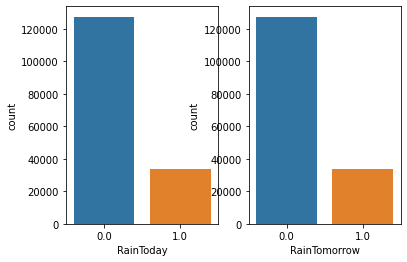

<Figure size 1440x1440 with 0 Axes>

In [16]:
##Số lượng raintoday and raintomorrow
fig, ax =plt.subplots(1,2)
print(data.RainToday.value_counts())
print(data.RainTomorrow.value_counts())

plt.figure(figsize=(20,20))
sns.countplot(data=data,x='RainToday',ax=ax[0])
sns.countplot(data=data,x='RainTomorrow',ax=ax[1])
##Ta sẽ thấy 2 giá trị yes:1 33807 là  giá trị ở rainToday và No:0 là 127347
##Ta sẽ thấy 2 giá trị yes:1 33804 là  giá trị ở RainTomorrow và No:0 là 127350

In [17]:
#Dropping date column
data=data.iloc[:,1:]
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,13.4,0.6,16.077647,7.603032,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.512574,16.9,21.8,0.0,0.0
1,Albury,7.4,7.4,0.0,16.077647,7.603032,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.455275,4.512574,17.2,24.3,0.0,0.0
2,Albury,12.9,12.9,0.0,16.077647,7.603032,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.455275,2.000000,21.0,23.2,0.0,0.0
3,Albury,9.2,9.2,0.0,16.077647,7.603032,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.455275,4.512574,18.1,26.5,0.0,0.0
4,Albury,17.5,17.5,1.0,16.077647,7.603032,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161149,Woomera,7.0,7.0,140.0,41.000000,10.000000,SE,66.0,4,E,104.0,7.0,3.0,96.0,998.0,1030.0,9.000000,3.000000,25.0,24.0,0.0,0.0
161150,Woomera,-1.0,-1.0,220.0,32.000000,8.000000,SE,97.0,49,E,34.0,37.0,97.0,48.0,1022.0,1006.0,3.000000,8.000000,27.0,21.0,0.0,0.0
161151,Woomera,4.0,4.0,158.0,108.000000,4.000000,SE,129.0,5,E,70.0,27.0,41.0,7.0,994.0,1027.0,9.000000,0.000000,-5.0,1.0,0.0,0.0
161152,Woomera,23.0,23.0,172.0,128.000000,9.000000,SE,74.0,21,E,95.0,70.0,90.0,95.0,1000.0,989.0,6.000000,1.000000,28.0,-1.0,0.0,0.0


In [18]:
##xử lý các giá trị dư thừa
dataset = preprocessing.LabelEncoder()
data['Location'] = dataset.fit_transform(data['Location'])
data['WindDir9am'] = dataset.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = dataset.fit_transform(data['WindDir3pm'])
data['WindGustDir'] = dataset.fit_transform(data['WindGustDir'])

In [31]:
data.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,13.4,0.6,16.077647,7.603032,13,44.0,101,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.512574,16.9,21.8,0.0,0.0
1,2,7.4,7.4,0.0,16.077647,7.603032,14,44.0,94,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.455275,4.512574,17.2,24.3,0.0,0.0
2,2,12.9,12.9,0.0,16.077647,7.603032,15,46.0,101,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.455275,2.000000,21.0,23.2,0.0,0.0
3,2,9.2,9.2,0.0,16.077647,7.603032,4,24.0,97,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.455275,4.512574,18.1,26.5,0.0,0.0
4,2,17.5,17.5,1.0,16.077647,7.603032,13,41.0,89,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0


In [20]:
print('Tổng giá trị dữ liệu và thuộc tính trước khi loại bỏ', data.shape )
data=data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
print('Tổng giá trị dữ liệu và thuộc tính sau khi loại bỏ', data.shape )

Tổng giá trị dữ liệu và thuộc tính trước khi loại bỏ (161154, 22)
Tổng giá trị dữ liệu và thuộc tính sau khi loại bỏ (145667, 22)


# Train và test

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=0)

In [22]:
x_train.shape## số lượng tập train 80%


(116533, 21)

In [23]:
x_test.shape## số lượng tập test 20%

(29134, 21)

In [24]:
x_test

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
127425,43,6.0,6.0,0.000000,16.077647,7.603032,12,44.000000,103,13,6.0,11.0,90.0,93.0,1003.8,1001.6,4.455275,4.512574,9.7,11.3,0.0
8145,10,16.2,16.2,5.600000,3.000000,7.603032,8,43.000000,99,12,24.0,17.0,48.0,26.0,1013.2,1012.5,1.000000,6.000000,18.9,25.8,1.0
7776,10,25.8,25.8,0.000000,18.800000,7.603032,4,52.000000,94,5,28.0,17.0,13.0,6.0,1010.3,1006.5,6.000000,6.000000,33.2,41.0,0.0
20632,26,21.3,21.3,0.000000,16.077647,7.603032,5,37.000000,91,4,11.0,26.0,85.0,79.0,1012.7,1009.8,4.455275,4.512574,24.5,26.5,0.0
99305,0,13.0,13.0,0.000000,16.077647,7.603032,15,43.000000,95,12,2.0,22.0,64.0,44.0,1012.5,1010.4,4.455275,4.512574,16.4,23.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100241,22,11.1,11.1,0.200000,3.600000,5.600000,10,54.000000,98,10,28.0,37.0,62.0,54.0,1021.7,1019.3,8.000000,7.000000,13.5,17.2,0.0
106214,48,8.5,8.5,0.000000,4.400000,2.300000,12,80.000000,100,12,41.0,50.0,68.0,40.0,1008.5,1010.0,3.000000,5.000000,10.7,13.9,0.0
40419,45,9.3,9.3,20.661646,16.077647,7.603032,9,42.595861,95,12,13.0,17.0,94.0,72.0,1030.7,1027.5,4.455275,8.000000,11.2,16.5,0.0
106564,48,12.0,12.0,0.000000,16.077647,7.603032,9,57.000000,98,9,35.0,24.0,47.0,17.0,1021.9,1020.3,4.455275,4.512574,15.4,24.4,0.0


In [25]:
x_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
99686,22,12.3,12.3,0.0,4.000000,3.500000,5,59.0,92,5,31.0,30.0,69.0,52.0,1015.400000,1012.400000,7.000000,7.000000,14.2,19.2,0.0
13524,21,19.5,19.5,0.0,5.600000,10.700000,5,35.0,92,3,20.0,13.0,69.0,36.0,1019.700000,1015.800000,1.000000,5.000000,23.2,29.4,0.0
54910,23,5.8,5.8,4.2,16.077647,7.603032,1,39.0,89,5,20.0,11.0,97.0,97.0,1016.901813,1014.547644,4.455275,4.512574,7.3,9.4,1.0
74238,25,7.1,7.1,0.6,16.077647,7.603032,0,39.0,88,0,24.0,26.0,100.0,100.0,1022.800000,1019.600000,4.455275,4.512574,9.9,11.0,0.0
75698,33,8.2,8.2,4.2,2.000000,4.300000,15,46.0,100,12,22.0,22.0,61.0,91.0,1008.200000,1008.900000,6.000000,8.000000,14.0,12.7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42049,45,17.8,17.8,0.0,24.000000,11.900000,11,48.0,95,3,13.0,11.0,69.0,29.0,1010.100000,1006.200000,0.000000,1.000000,23.1,35.5,0.0
97853,0,4.9,4.9,16.4,3.400000,7.603032,10,57.0,96,11,19.0,22.0,83.0,41.0,1018.800000,1019.900000,4.455275,4.512574,6.6,13.5,1.0
96152,39,25.7,25.7,0.6,6.600000,7.603032,2,52.0,98,2,17.0,33.0,66.0,62.0,1008.100000,1005.100000,8.000000,4.512574,29.1,32.2,0.0
118211,32,6.3,6.3,0.0,3.200000,7.400000,15,28.0,92,15,6.0,19.0,76.0,53.0,1023.300000,1020.200000,6.000000,3.000000,14.2,17.8,0.0


##Sử dụng thuật toán  Logistic Regression

In [26]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")


The accuracy of Logistic Regression is :  84.00494267865723 %


##Sử dụng thuật toán XGBoost


In [27]:
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(x_train,y_train)
predicted = xgbc.predict(x_test)
print ("The accuracy of XGBoost is : ", accuracy_score(y_test, predicted)*100, "%")


The accuracy of XGBoost is :  84.75664172444567 %


#Sử dụng thuật toán Gaussian Naive Bayes

In [28]:
model = GaussianNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")


The accuracy of Gaussian Naive Bayes model is :  80.16750188782865 %


##Sử dụng thuật toán Bernoulli Naive Bayes


In [29]:
model = BernoulliNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Bernoulli Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")



The accuracy of Bernoulli Naive Bayes model is :  76.67330267041945 %


##Sử dụng thuật toán Random Forest

In [30]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")


The accuracy of Random Forest is :  85.48431386009473 %
